In [1]:
import os

base_dir = "ds_megha"

folders = [
    "csv_files",
    "outputs"
]

os.makedirs(base_dir, exist_ok=True)

for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

print("Folder structure created successfully")

Folder structure created successfully


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset Loading

In [3]:
import pandas as pd

trades = pd.read_csv("/content/historical_data.csv")
sentiment = pd.read_csv("/content/fear_greed_index.csv")

In [4]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


# Cleaning the fear_greed Dataset

In [6]:
# Normalize sentiment labels
sentiment['classification'] = sentiment['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

# Cleaning the historical Dataset



In [7]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)

In [8]:
trades['date'] = trades['Timestamp IST'].dt.date

In [9]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

# Merge Trades + Sentiment

In [10]:
merged = pd.merge(
    trades,
    sentiment[['date', 'classification']],
    on='date',
    how='inner'
)

In [11]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Greed


In [12]:
merged.to_csv(
    "ds_megha/csv_files/merged_sentiment_trader.csv",
    index=False
)

# Analysis 1 – Trade count vs sentiment

In [13]:
trade_count = merged.groupby('classification')['Trade ID'].count()
trade_count

,Trade ID
classification,
Fear,83237
Greed,90295
Neutral,37686


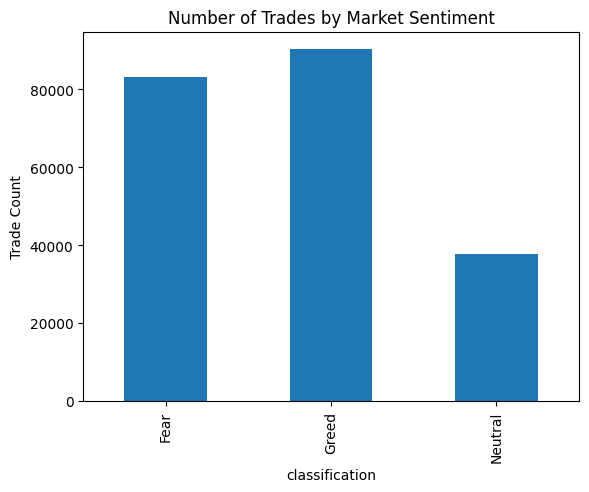

In [14]:
trade_count.plot(kind='bar')
plt.title("Number of Trades by Market Sentiment")
plt.ylabel("Trade Count")
plt.savefig("ds_megha/outputs/trades_by_sentiment.png")
plt.show()

# Analysis 2 – Average trade size

In [15]:
avg_size = merged.groupby('classification')['Size USD'].mean()
avg_size

,Size USD
classification,
Fear,7182.011019
Greed,4574.424490
Neutral,4782.732661


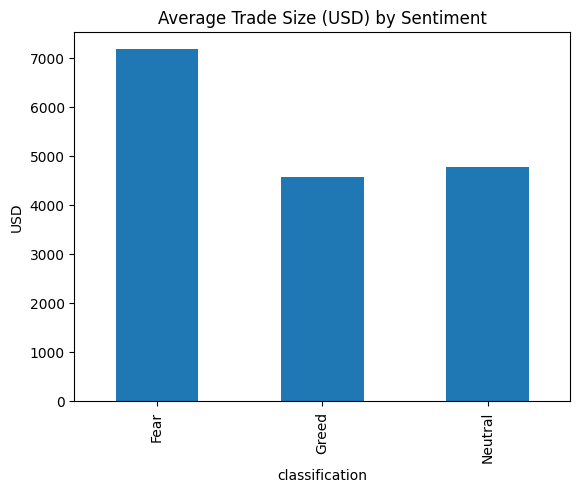

In [16]:
avg_size.plot(kind='bar')
plt.title("Average Trade Size (USD) by Sentiment")
plt.ylabel("USD")
plt.savefig("ds_megha/outputs/avg_trade_size.png")
plt.show()

# Analysis 3 – Profitability (only non-zero PnL)

In [17]:
pnl_data = merged[merged['Closed PnL'] != 0]

avg_pnl = pnl_data.groupby('classification')['Closed PnL'].mean()
avg_pnl

,Closed PnL
classification,
Fear,101.861682
Greed,105.700767
Neutral,71.199993


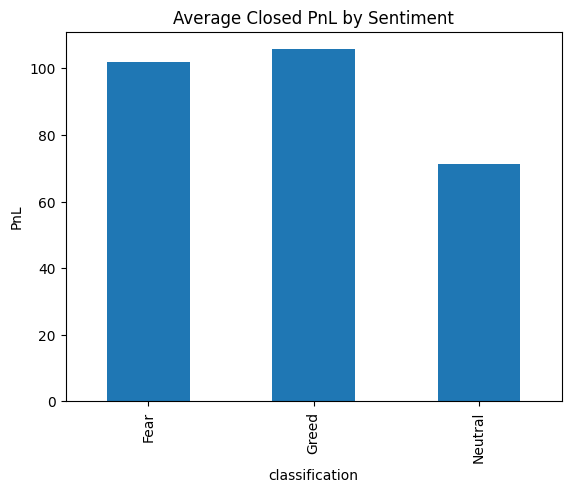

In [18]:
avg_pnl.plot(kind='bar')
plt.title("Average Closed PnL by Sentiment")
plt.ylabel("PnL")
plt.savefig("ds_megha/outputs/avg_pnl.png")
plt.show()

In [19]:
readme_text = """
# Trader Behavior Insights Using Market Sentiment

This project analyzes the relationship between cryptocurrency trader behavior
and Bitcoin market sentiment using historical trading data and the Fear-Greed Index.

## Project Structure
- notebook_1.ipynb: Data cleaning, analysis, and visualizations (Google Colab)
- csv_files/: Processed datasets used for analysis
- outputs/: Visualizations and charts generated during analysis
- ds_report.pdf: Summary of insights and business recommendations
- README.md: Project overview and instructions

## Datasets
- Historical Trader Data (Hyperliquid)
- Bitcoin Fear-Greed Index

## Tools Used
- Python (Pandas, Matplotlib, Seaborn)
- Google Colab

## Objective
To understand how market sentiment (Fear vs Greed) influences trading activity,
trade size, and profitability, and to derive insights for smarter trading strategies.
"""

with open("ds_megha/README.md", "w") as f:
    f.write(readme_text)

print("README.md written successfully")


README.md written successfully


In [20]:
with open("ds_megha/README.md", "r") as f:
    print(f.read())


# Trader Behavior Insights Using Market Sentiment

This project analyzes the relationship between cryptocurrency trader behavior
and Bitcoin market sentiment using historical trading data and the Fear-Greed Index.

## Project Structure
- notebook_1.ipynb: Data cleaning, analysis, and visualizations (Google Colab)
- csv_files/: Processed datasets used for analysis
- outputs/: Visualizations and charts generated during analysis
- ds_report.pdf: Summary of insights and business recommendations
- README.md: Project overview and instructions

## Datasets
- Historical Trader Data (Hyperliquid)
- Bitcoin Fear-Greed Index

## Tools Used
- Python (Pandas, Matplotlib, Seaborn)
- Google Colab

## Objective
To understand how market sentiment (Fear vs Greed) influences trading activity,
trade size, and profitability, and to derive insights for smarter trading strategies.



In [21]:
import os
os.listdir("ds_megha")

['ds_report.pdf', 'outputs', '.ipynb_checkpoints', 'csv_files', 'README.md']

In [22]:
import shutil

shutil.make_archive("ds_megha", "zip", "ds_megha")
print("ZIP file created successfully")

ZIP file created successfully
